In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import nengo
import nengo_spa as spa

from nengo_learn_assoc_mem.utils import BasicVecFeed, meg_from_spikes, make_alt_vocab

# Firing Rate Adjustment in 2D

If a neuron responds to the vector stimulus, reduce it's firing rate.

In [23]:
n_neurons = 100
p_neg = 25

vec_1 = [-1, -1]
vec_2 = [1, 1]

In [24]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons, 2)

In [25]:
sim = nengo.Simulator(model)

Building finished in 0:00:00.                                                                                           


In [26]:
_, activity_1 = nengo.utils.ensemble.tuning_curves(ens, sim, inputs=np.array(vec_1))

In [27]:
activity_1.shape

(100,)

In [28]:
len(activity_1[activity_1 > 0])

54

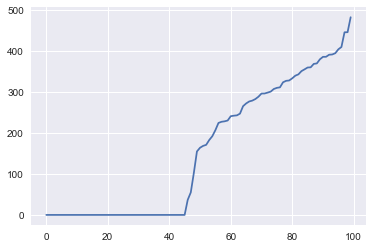

In [34]:
plt.plot(np.sort(activity_1))

In [30]:
built = sim.data[ens]

In [36]:
built.max_rates[activity_1 > 0] = built.max_rates[activity_1 > 0] + 100

with nengo.Network() as adj_model:
    ens = nengo.Ensemble(n_neurons, 2,
                         encoders=built.encoders,
                         eval_points=built.eval_points,
                         intercepts=built.intercepts,
                         max_rates=built.max_rates)

In [37]:
adj_sim = nengo.Simulator(adj_model)

Building finished in 0:00:00.                                                                                           


In [38]:
_, post_activity_1 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=np.array(vec_1))

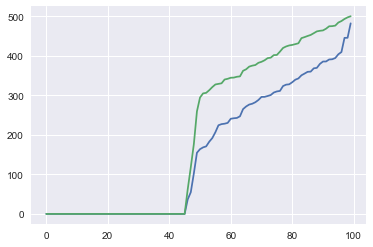

In [39]:
plt.plot(np.sort(activity_1))
plt.plot(np.sort(post_activity_1))

In [43]:
samples = 50
input_1 = -1*np.ones((samples, 2)) + np.random.uniform(size=(samples, 2))*0.1
input_2 = np.ones((samples, 2)) + np.random.uniform(size=(samples, 2))*0.1

In [44]:
_, avg_act_1 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=input_1)
_, avg_act_2 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=input_2)

In [45]:
columns = ("vec", "resp")

a1 = avg_act_1.flatten()
l1 = ["v1"] * len(a1)
p1 = pd.DataFrame({"vec": l1, "resp": list(a1)})


a2 = avg_act_2.flatten()
l2 = ["v2"] * len(a2)
p2 = pd.DataFrame({"vec": l2, "resp": list(a2)})

acts = pd.concat((p1, p2))

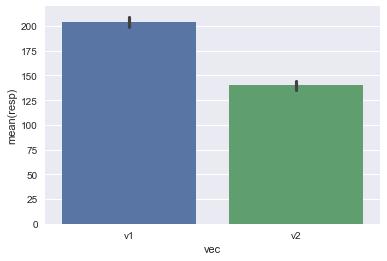

In [46]:
sns.barplot(x="vec", y="resp", data=acts)